In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from functions import *
from stripthem import *

# Processing

In [2]:
path = ('D:\\Uni\\mri\\SK_MRI\\MS_dataset_full\\MS\\01_1\\png')

In [3]:
im = 'IM000012.png'

In [4]:
npat = os.path.join(path,im)

In [5]:
img = cv2.imread(os.path.join(path,im))

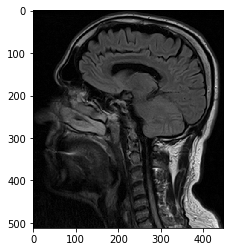

In [6]:
view(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
#mask_0 = gray < 140

In [9]:
#view(mask_0)

In [10]:
#exp = applymask(img, mask_0)

In [11]:
#view(exp)

In [12]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

In [13]:
def remg(image): #remove garbage
    image = image.astype(np.uint8)
    nb_components, output, stats, _ = cv2.connectedComponentsWithStats(image, connectivity = 8)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    cleanimage = np.zeros(output.shape)
    cleanimage[output == max_label] = 255
    return cleanimage

In [14]:
brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)

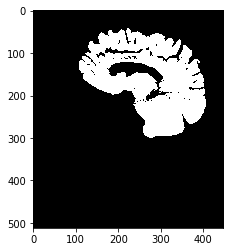

In [15]:
view(brain_mask)

In [16]:
closing = close(brain_mask,10)

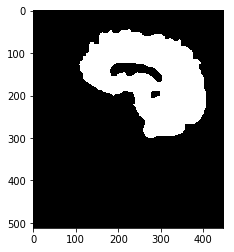

In [17]:
view(closing)

In [18]:
fill = floodfill(closing)

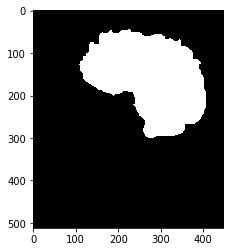

In [19]:
view(fill)

In [20]:
im2, contours, hierarchy = cv2.findContours(fill, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
cnt = contours[0]

In [22]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

In [23]:
aspect_ratio

1.1556420233463034

In [24]:
cv2.isContourConvex(cnt)

False

In [25]:
hull = cv2.convexHull(cnt)

In [26]:
(x,y),radius = cv2.minEnclosingCircle(cnt)

In [27]:
zim = np.zeros(gray.shape)

In [28]:
center = (int(x),int(y))
radius = int(radius)
cir = cv2.circle(zim,center,radius,(255,0,0),2)

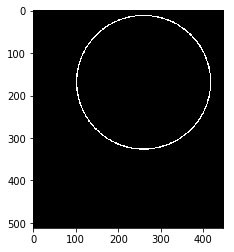

In [29]:
view(cir)
cir = np.uint8(cir)

In [30]:
fir = floodfill(cir)

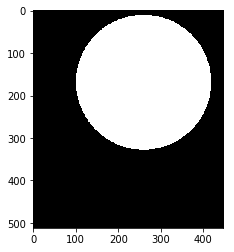

In [31]:
view(fir)

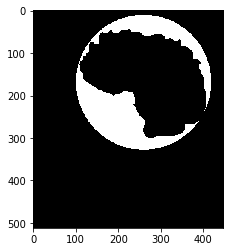

In [32]:
view(fir - fill)

In [33]:
np.sum(fir== 255)/np.sum(fill == 255)

1.6237597266252213

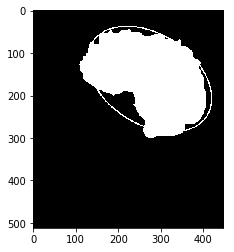

In [34]:
ellipse = cv2.fitEllipse(cnt)
view(cv2.ellipse(fill,ellipse,(255,0,0),2))

In [35]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.8808525442660172

In [36]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.6302453851091984

In [37]:
perimeter = cv2.arcLength(cnt,True)
perimeter

1057.1513627767563

In [38]:
area = cv2.contourArea(cnt)
area

48106.0

In [39]:
area / perimeter

45.5053095458751